In [1]:
from solarmach import SolarMACH, print_body_list

In [2]:
# optional: get list of available bodies/spacecraft
print(print_body_list().index)

Index(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'L1', 'ACE', 'STEREO B',
       'STEREO A', 'SOHO', 'Solar Orbiter', 'PSP', 'BepiColombo', 'MAVEN',
       'Mars Express', 'MESSENGER', 'JUICE', 'Juno', 'Cassini', 'Rosetta',
       'Pioneer10', 'Pioneer11', 'Ulysses', 'Voyager1', 'Voyager2'],
      dtype='object', name='Key')


In [3]:
# necessary options
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [400, 400, 400, 400, 400, 400, 400]   # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:15:00'

# optional parameters
coord_sys = 'Carrington'                         # 'Carrington' (default) or 'Stonyhurst'
reference_long = 273                             # longitude of reference (None to omit)
reference_lat = 0                                # latitude of reference (None to omit)
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = True                        # plot straight line between Sun and body
long_offset = 270                                # longitudinal offset for polar plot; defines where Earth's longitude is (by default 270, i.e., at "6 o'clock")
reference_vsw = 400                              # define solar wind speed at reference
return_plot_object = True                        # figure and axis object of matplotib are returned, allowing further adjustments to the figure
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker
filename = 'Solar-MACH_'+date.replace(' ', '_')  # define filename of output figure

In [4]:
# initialize
sm = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys)

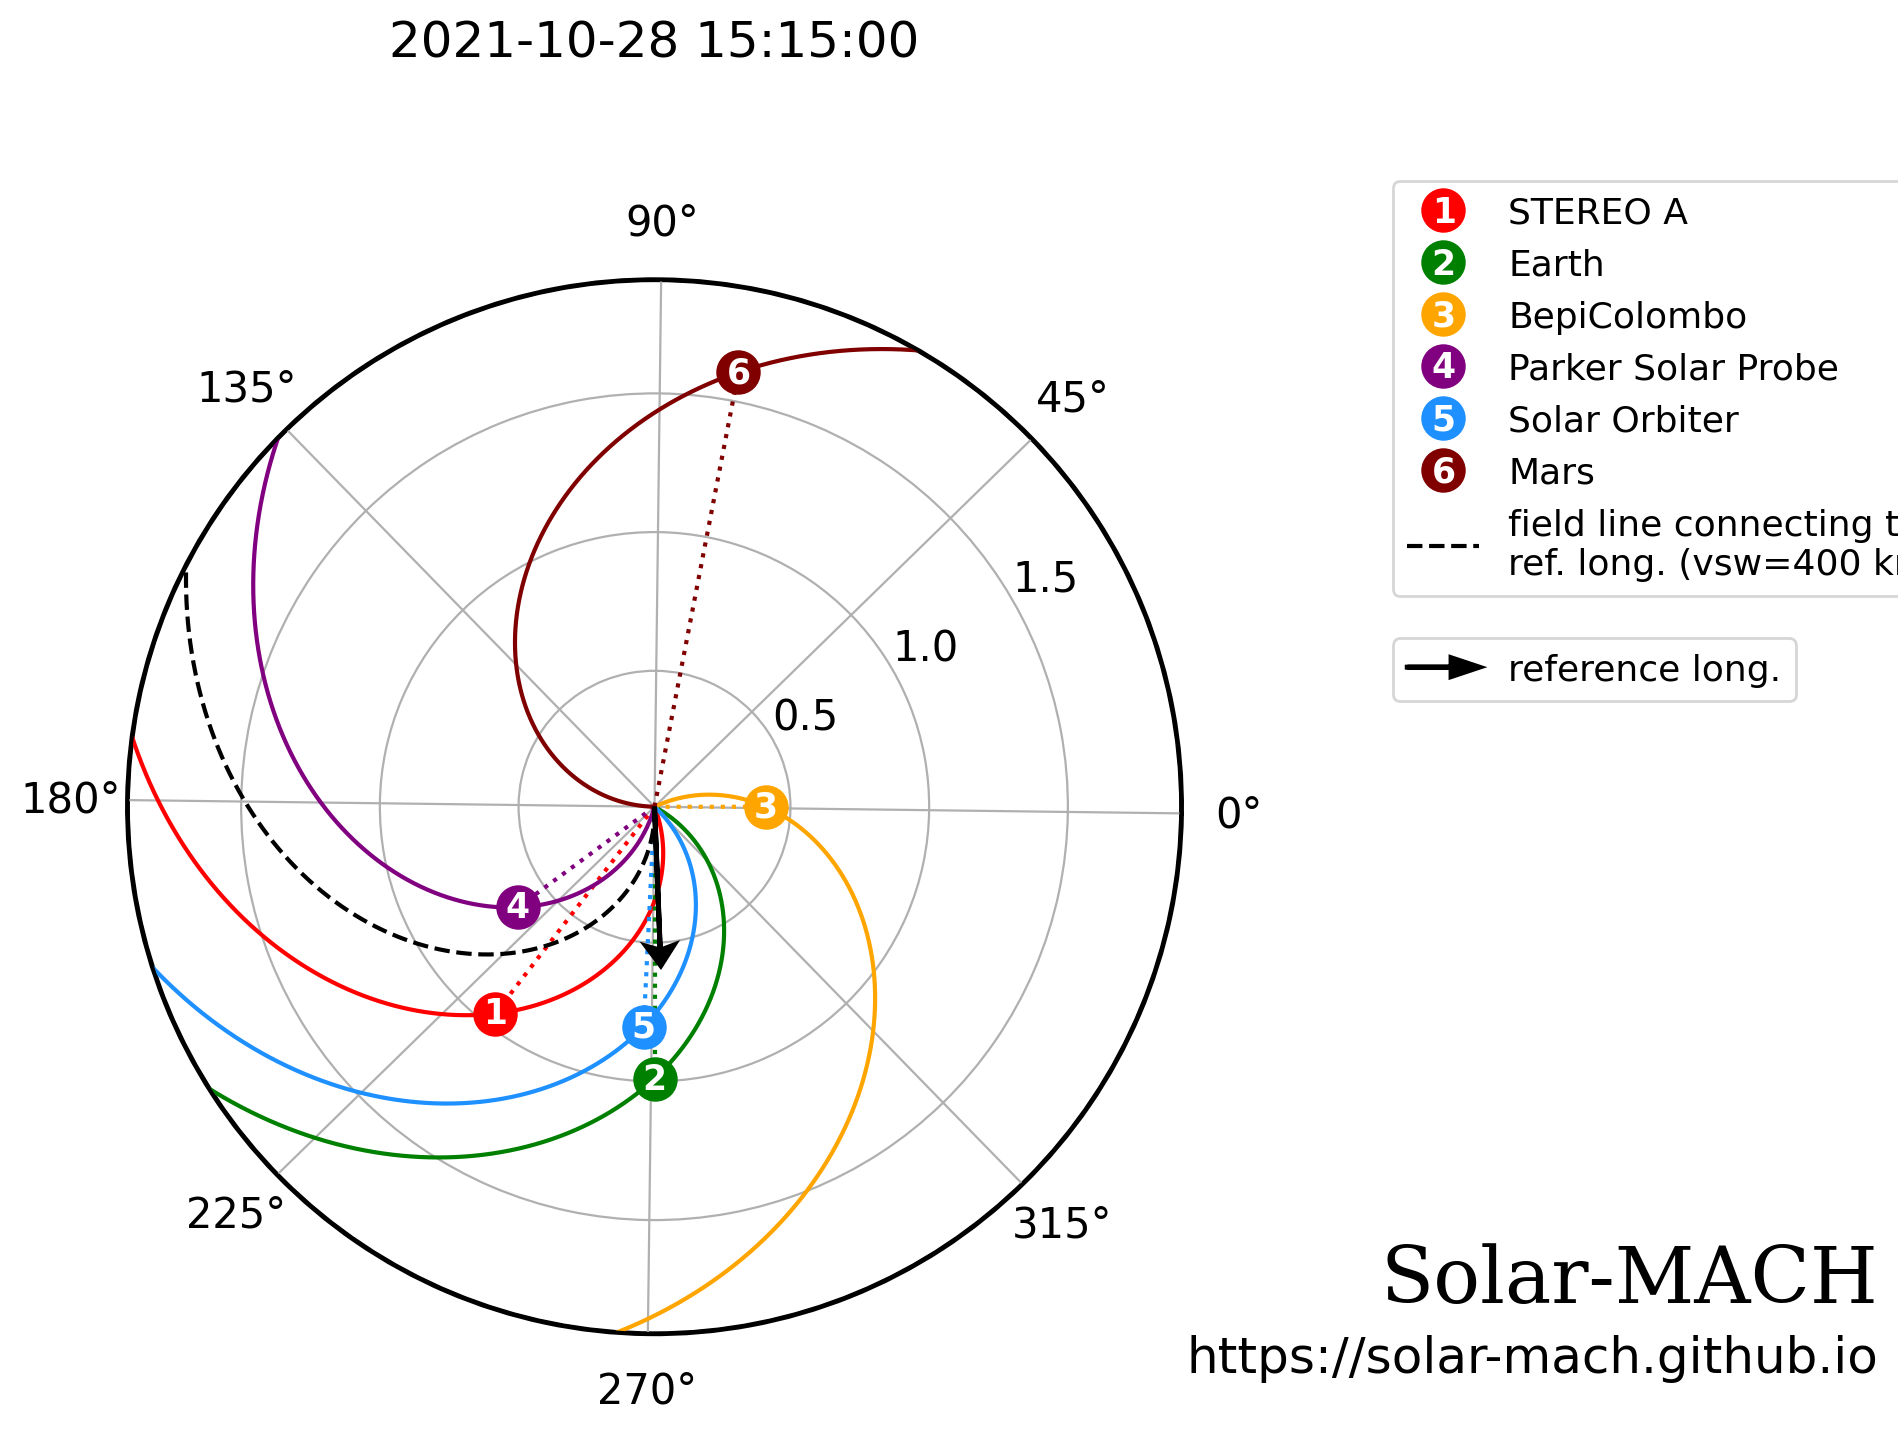

In [5]:
# make plot
fig, ax = sm.plot(plot_spirals=plot_spirals, plot_sun_body_line=plot_sun_body_line, 
                  reference_vsw=reference_vsw, transparent=transparent, numbered_markers=numbered_markers,
                  long_offset=long_offset, return_plot_object=return_plot_object)

In [7]:
# obtain data as Pandas DataFrame
sm.coord_table

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,STEREO-A,233.126174,7.169620,0.958293,-37.596200,2.455301,400,292.330760,-39.873826,19.330760,7.169620
1,Earth,270.722374,4.714319,0.993490,0.000000,0.000000,400,332.494524,-2.277626,59.494524,4.714319
2,BepiColombo,0.670767,0.906013,0.411289,-270.051607,-3.808306,400,26.189137,-272.329233,113.189137,0.906013
3,PSP,217.073333,3.854161,0.623180,-53.649041,-0.860158,400,255.773079,-55.926667,-17.226921,3.854161
4,Solar Orbiter,267.902649,2.189175,0.803863,-2.819725,-2.525144,400,318.014377,-5.097351,45.014377,2.189175
5,Mars,79.786246,-4.884839,1.610973,-190.936128,-9.599158,400,180.097212,-193.213754,-92.902788,-4.884839


## More plotting options
### Add 6 background Parker spirals for solar wind speed of 350 km/s with dotted red lines and alpha setting 0.2

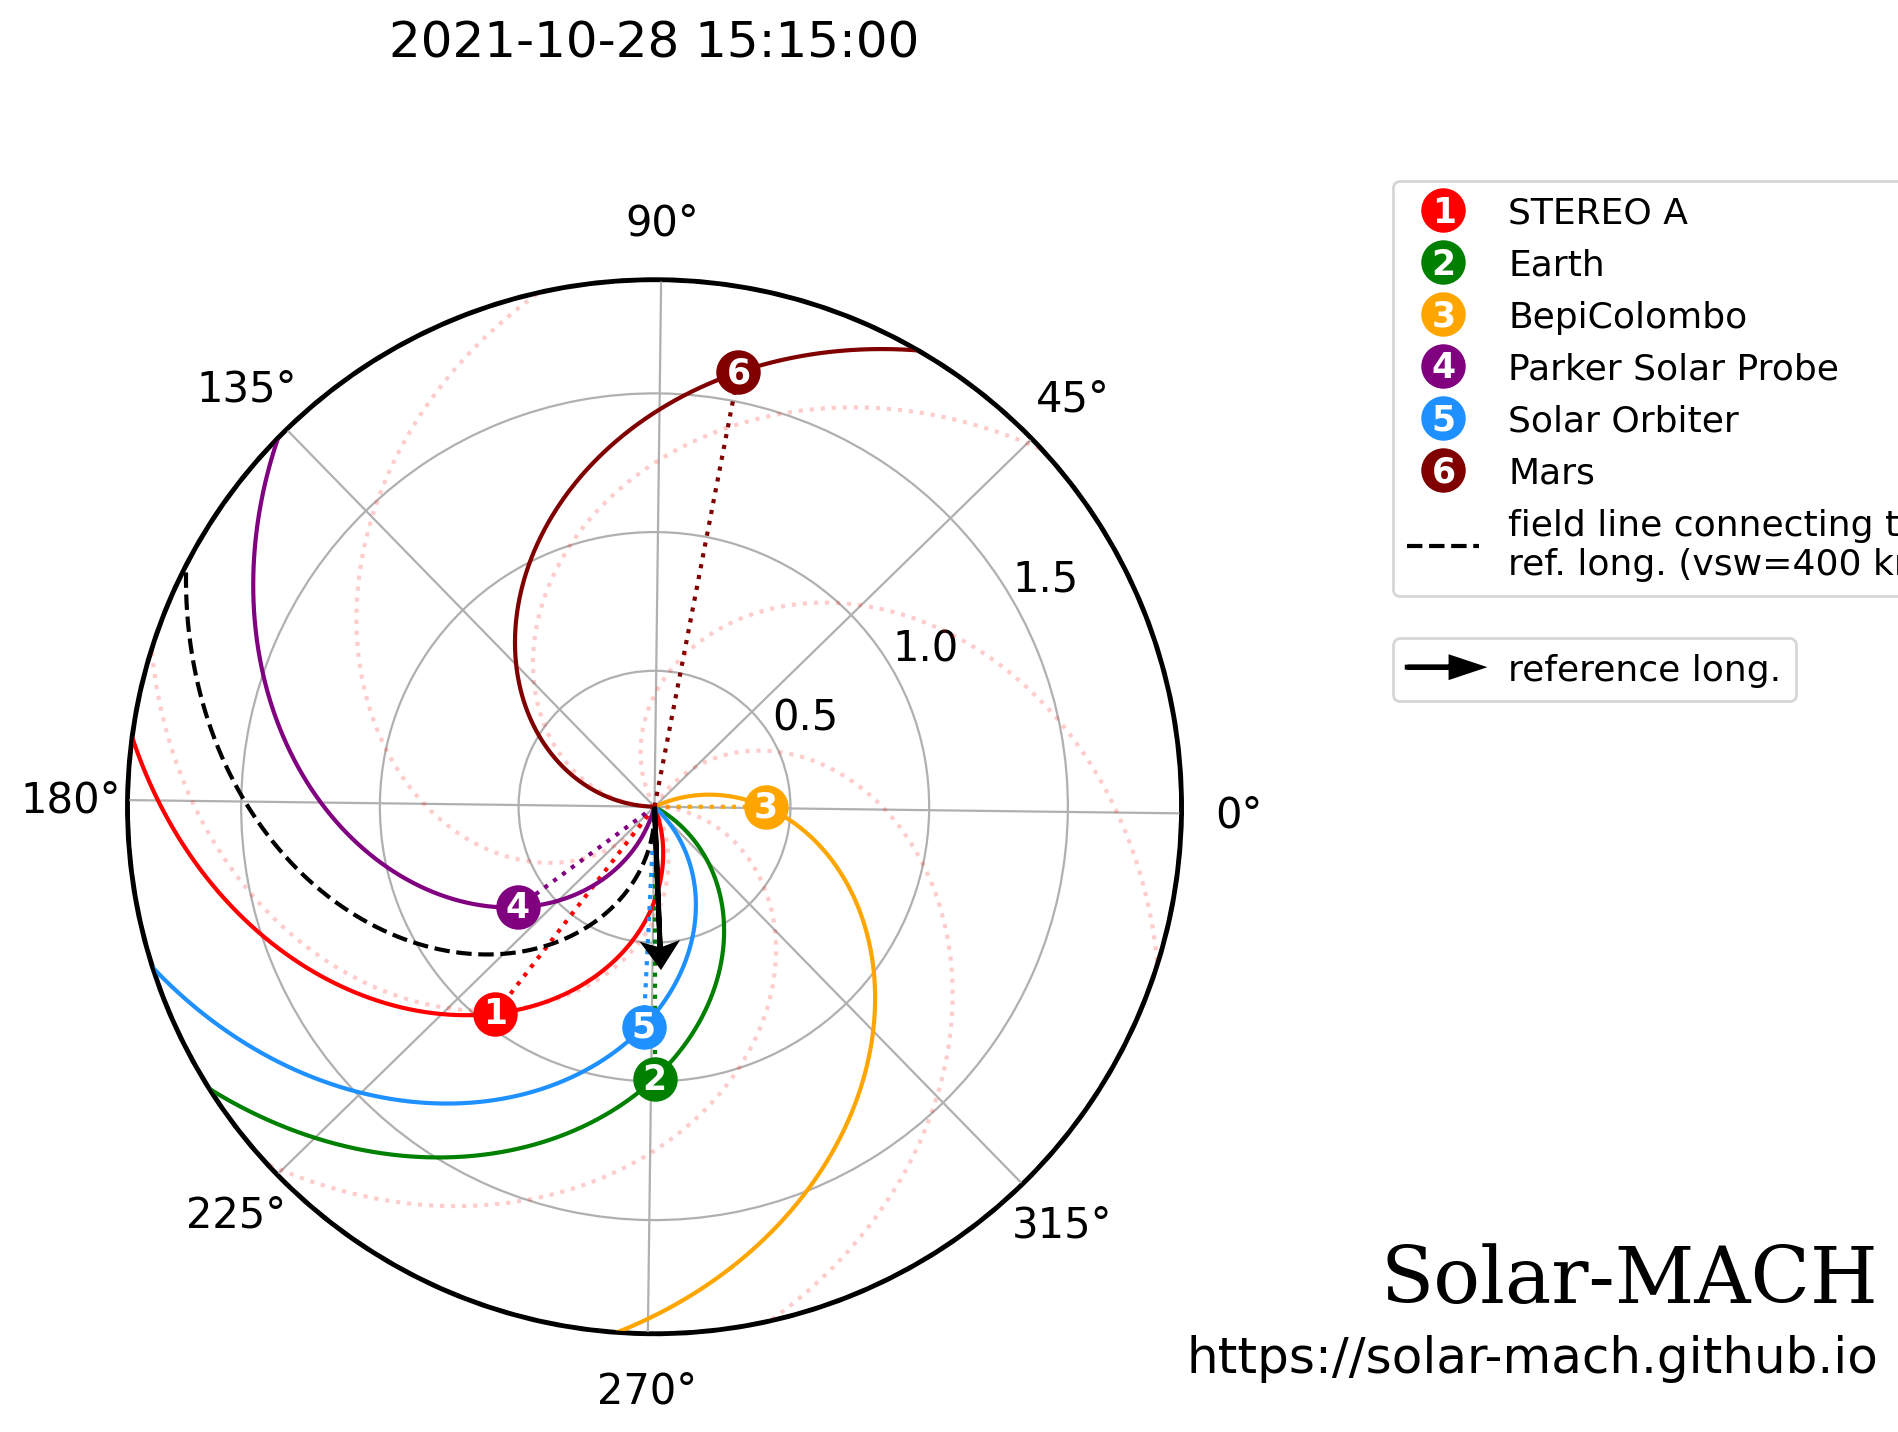

In [8]:
background_spirals = [6, 350, ':', 'red', 0.2]

fig, ax = sm.plot(plot_spirals=plot_spirals, plot_sun_body_line=plot_sun_body_line, 
                  reference_vsw=reference_vsw, transparent=transparent, numbered_markers=numbered_markers,
                  long_offset=long_offset, return_plot_object=return_plot_object, 
                  background_spirals=background_spirals)

### Color an area in the heliographic plane between two Parker spirals

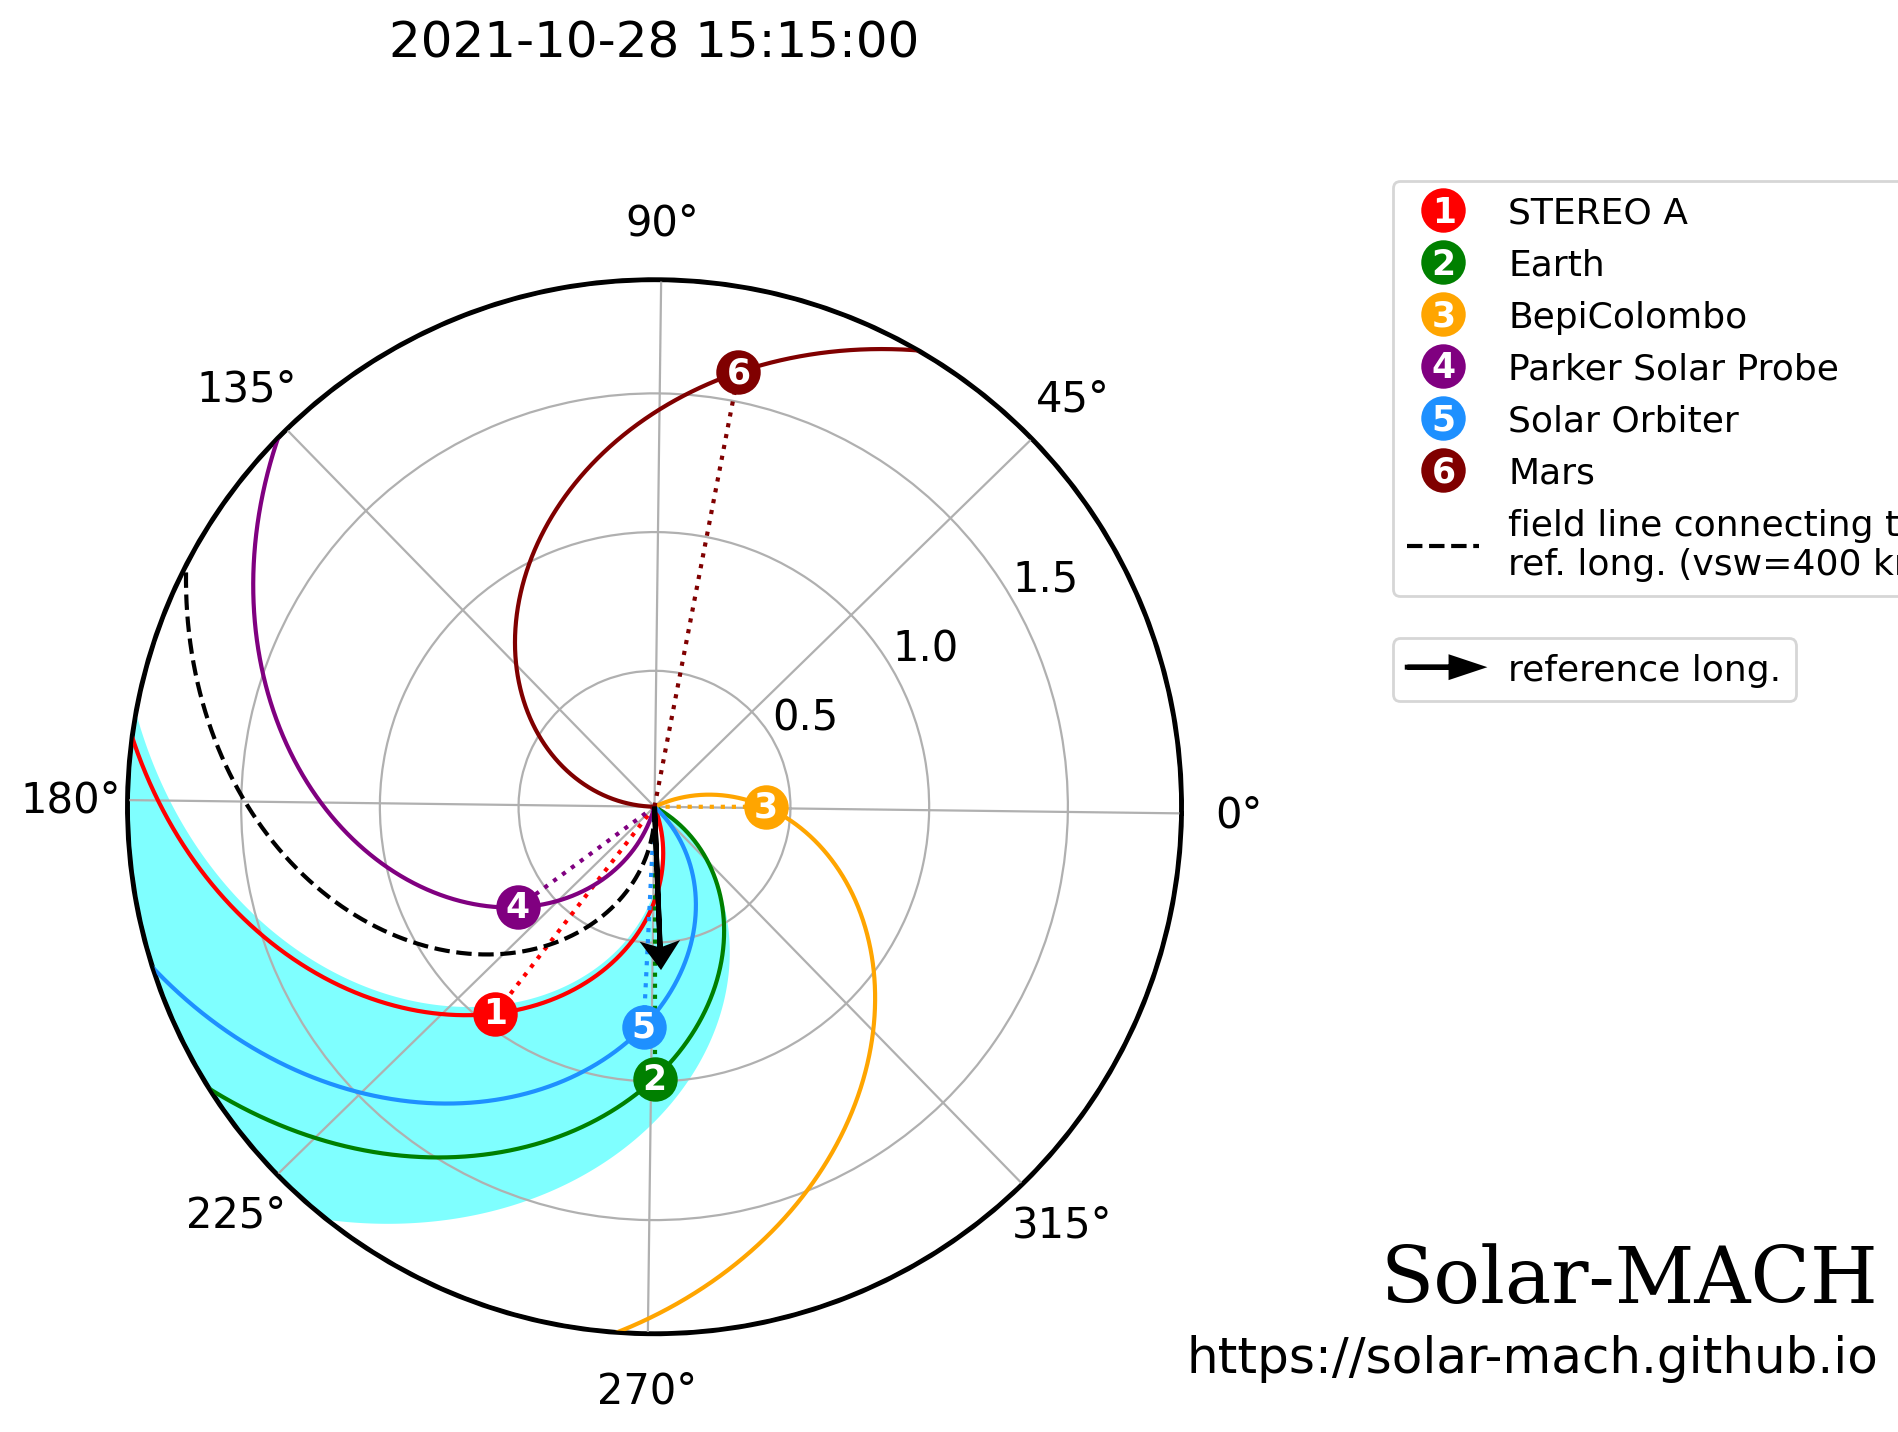

In [9]:
long_sector = [290, 328]      # longitude of edges of colored area
long_sector_vsw = [400, 500]  # solar wind speed for Parker spirals of edges of colored area
long_sector_color = 'cyan'    # color

fig, ax = sm.plot(plot_spirals=plot_spirals, plot_sun_body_line=plot_sun_body_line, 
                  reference_vsw=reference_vsw, transparent=transparent, numbered_markers=numbered_markers,
                  long_offset=long_offset, return_plot_object=return_plot_object, 
                  long_sector=long_sector, long_sector_vsw=long_sector_vsw, long_sector_color=long_sector_color)

### Color a cone-shaped area in the heliographic plane

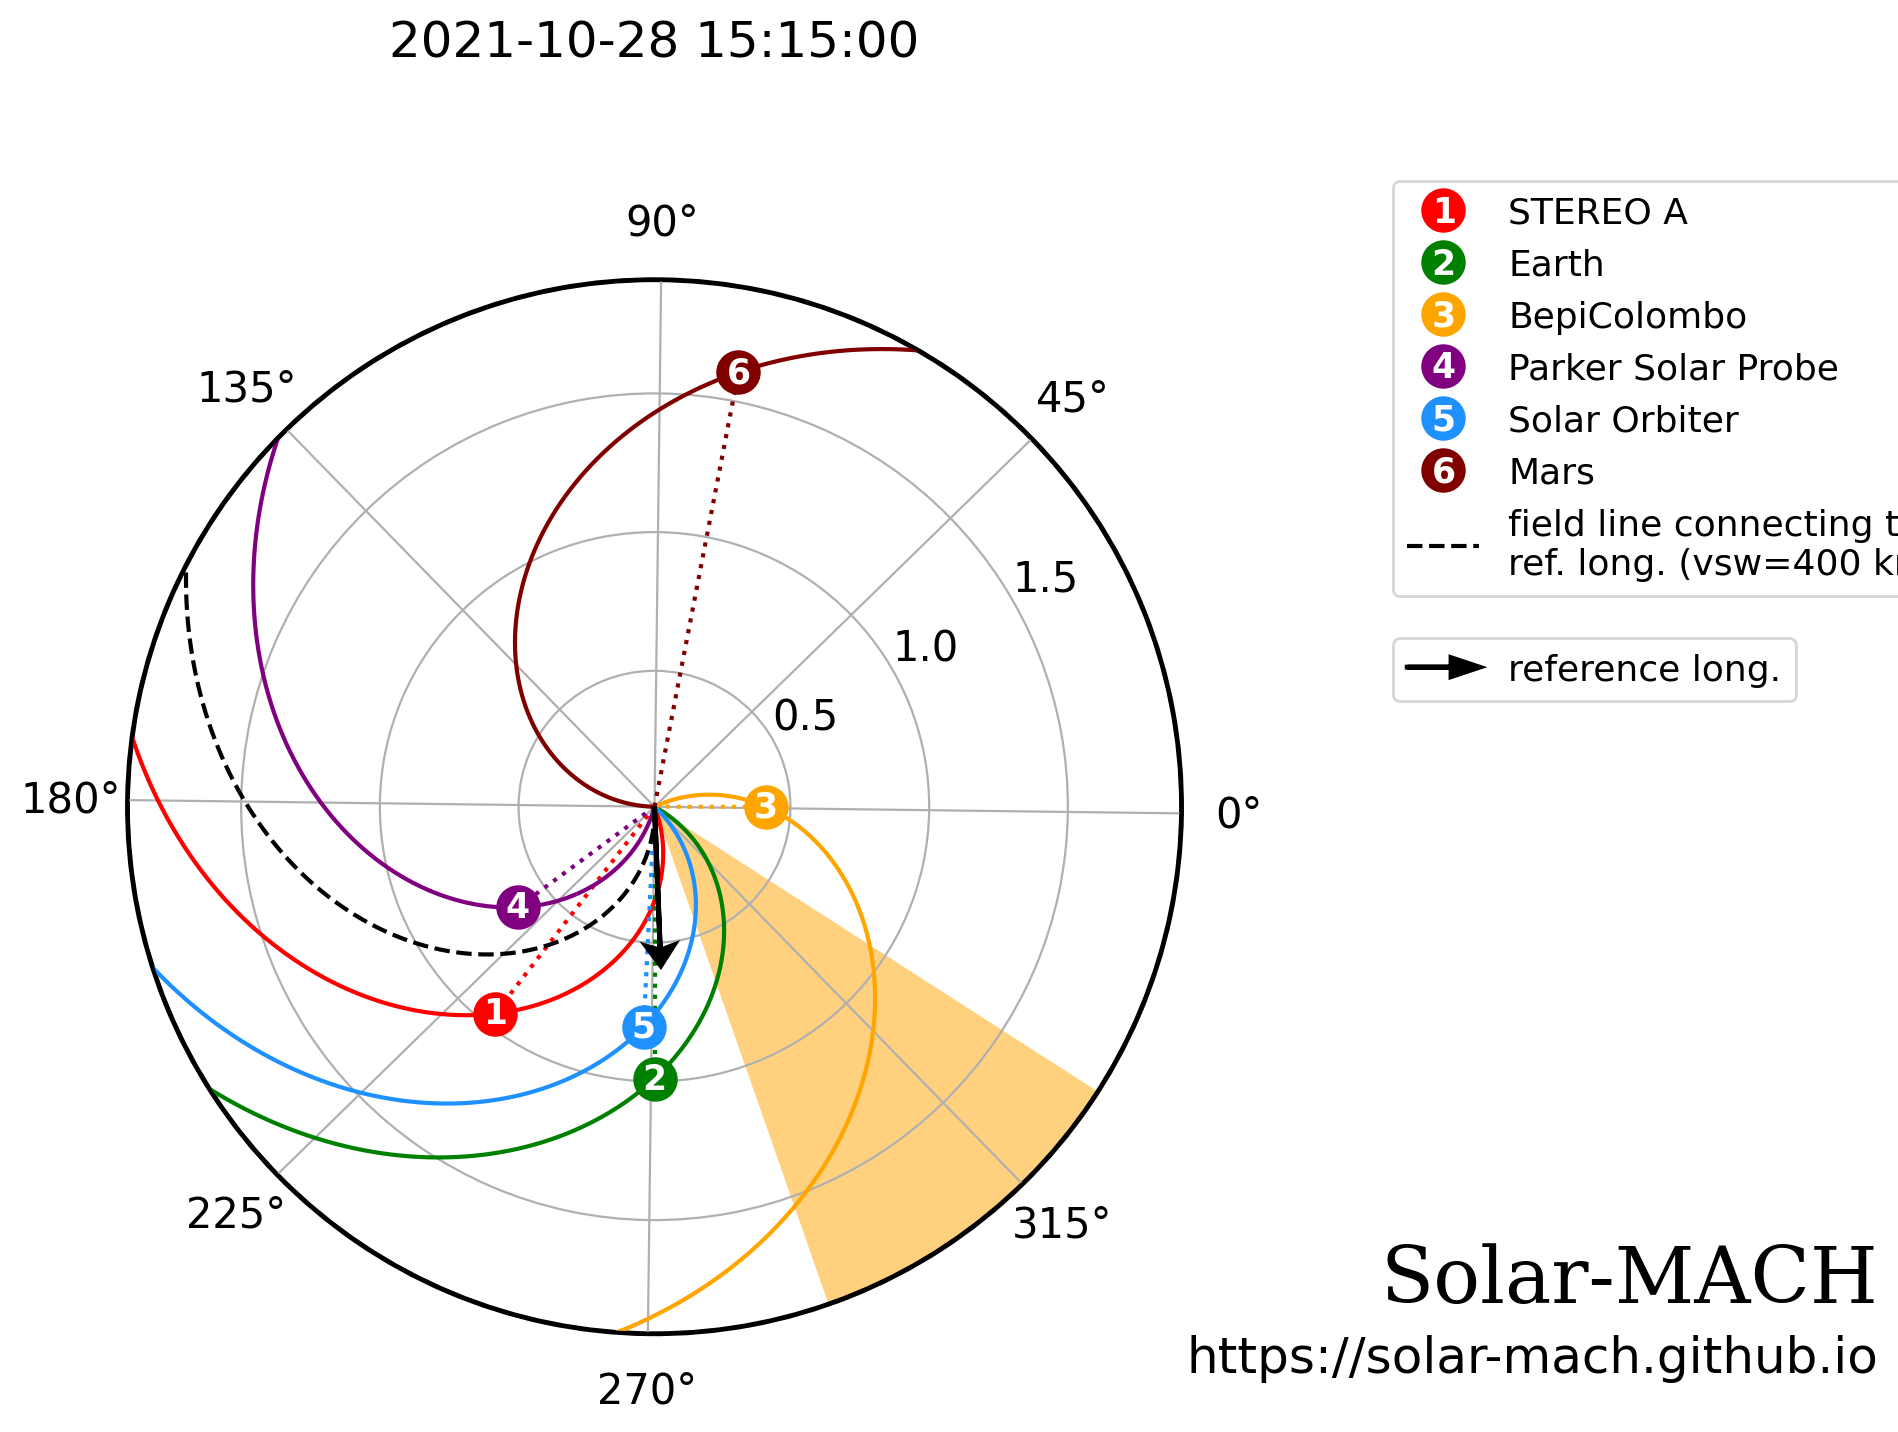

In [10]:
long_sector = [290, 328]      # longitude of edges of colored area
long_sector_vsw = None        # if None (default), use straight lines instead of Parker spirals
long_sector_color = 'orange'  # color

fig, ax = sm.plot(plot_spirals=plot_spirals, plot_sun_body_line=plot_sun_body_line, 
                  reference_vsw=reference_vsw, transparent=transparent, numbered_markers=numbered_markers,
                  long_offset=long_offset, return_plot_object=return_plot_object, 
                  long_sector=long_sector, long_sector_vsw=long_sector_vsw, long_sector_color=long_sector_color)